<h1><center>Income prediction by using Decision Tree</h1></center>

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,accuracy_score,homogeneity_score
from graphviz import Source

In [2]:
#load the dataset
df=pd.read_csv("D:\\semester 3\\ml\\lab dataset\\adult_dataset.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**EDA**

In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print(df.shape)
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])

(32561, 15)
Rows     :  32561
Columns  :  15


In [6]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
#checking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

There is no null values in the dataset. But while manually seeing in the dataset, there are some question marks are there in the dataset. We have to remove those things.

In [9]:
df_check_missing_workclass = (df['workclass']=='?').sum()
df_check_missing_workclass

1836

In [10]:
df_check_missing_occupation = (df['occupation']=='?').sum()
df_check_missing_occupation

1843

In [11]:
percent_missing = (df=='?').sum() * 100/len(df)
percent_missing

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

The missing values are around 5% only. So we are dropping those columns.

In [12]:
df = df[df['workclass'] !='?']
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [13]:
df.apply(lambda x: x !='?',axis=1).sum()

age               30725
workclass         30725
fnlwgt            30725
education         30725
education.num     30725
marital.status    30725
occupation        30718
relationship      30725
race              30725
sex               30725
capital.gain      30725
capital.loss      30725
hours.per.week    30725
native.country    30169
income            30725
dtype: int64

In [14]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.apply(lambda x: x=='?',axis=1).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [15]:
df = df[df['occupation'] !='?']
df = df[df['native.country'] !='?']

**Data preprocessing**

In [16]:
from sklearn import preprocessing
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education.num'}>,
        <AxesSubplot:title={'center':'capital.gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours.per.week'}>]], dtype=object)

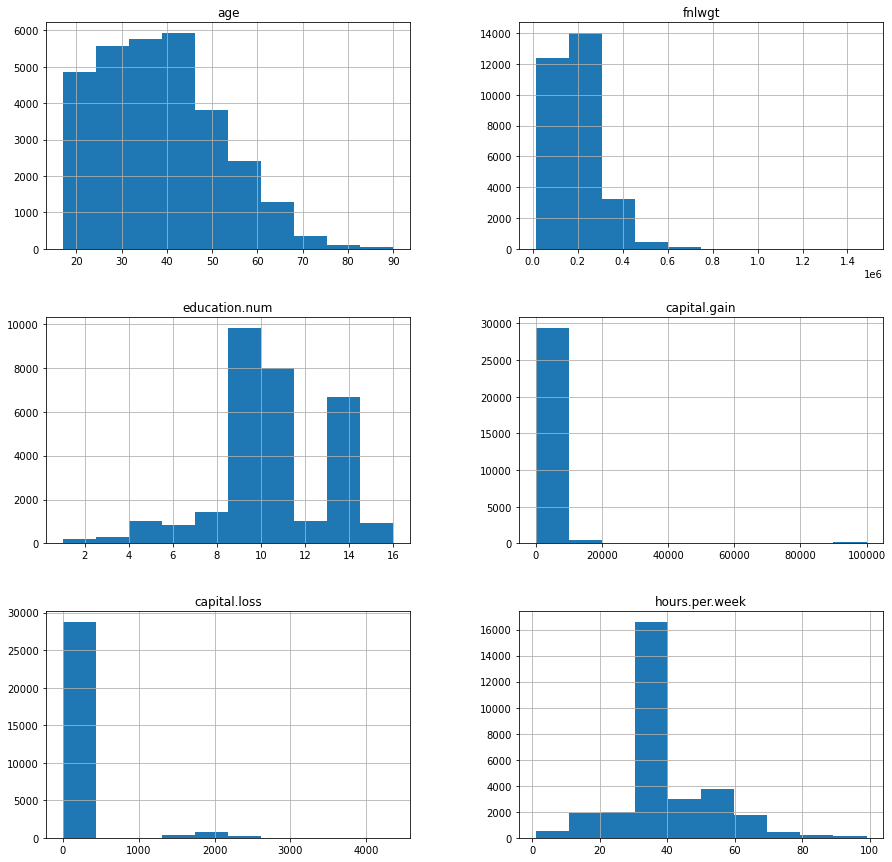

In [18]:
df.hist(figsize=(15,15))

From the histogram, we can able to see the distribution of the columns. people's with the age 40-45 are high in number. 

In [19]:
df.skew()

age                0.530228
fnlwgt             1.459220
education.num     -0.305379
capital.gain      11.902682
capital.loss       4.526380
hours.per.week     0.330869
dtype: float64

Since here we have income as target variable we can see it's showing integer though we need to figure out labelled as <=50𝐾 𝑎𝑛𝑑 >50K and >50K as categorical.

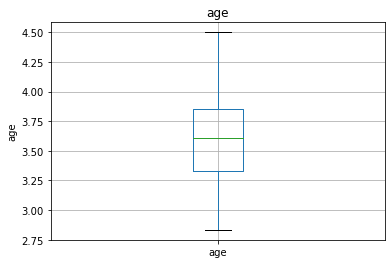

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [20]:
#Outliers
for feature in df:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [21]:
# relation between income and other attributes
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

<AxesSubplot:xlabel='income', ylabel='count'>

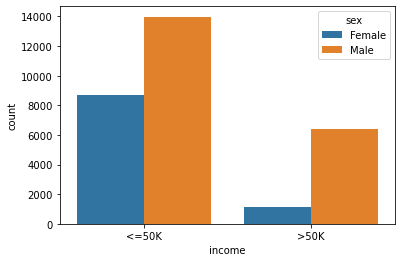

In [22]:
sns.countplot(x = 'income', data = df,hue='sex')

Males are getting high salaries compared to females. Males getting around 14000.

<AxesSubplot:xlabel='income', ylabel='count'>

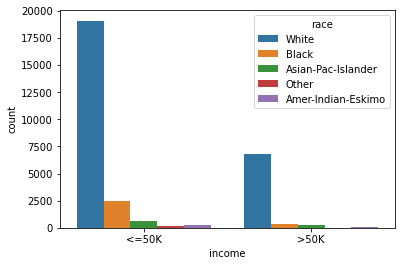

In [23]:
sns.countplot(x = 'income', data = df,hue='race')

White race people's are getting high salaries than black, asian-pac-islander, other, amer-indian-eskimo. 

<AxesSubplot:xlabel='income', ylabel='count'>

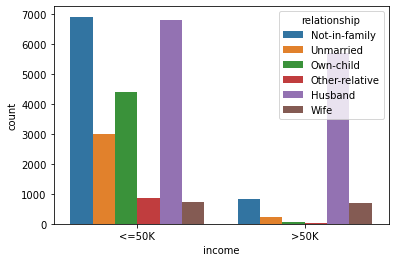

In [24]:
sns.countplot(x = 'income', data = df,hue='relationship')

Not-in-family and husband are getting the high salary both in the category of greater than and less than 50k.

In [25]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [26]:
# first, Drop earlier duplicate columns which had categorical values
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [27]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,0.080540,-0.001111,-0.276373,-0.005682,-0.246456,0.023374,0.081993,-0.001905,0.241998
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.032493,-0.027102,0.032163,0.000204,0.009298,-0.023895,0.025362,-0.066717,-0.008957
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,0.037833,0.345410,-0.063419,0.087717,-0.091935,0.032805,0.006157,0.091555,0.335286
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,0.035350,0.030575,-0.042418,0.022162,-0.058259,0.014353,0.048814,0.008530,0.221196
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.007204,0.015028,-0.035203,0.014607,-0.063567,0.023517,0.047011,0.009386,0.150053
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000,0.050724,0.059887,-0.189003,0.018365,-0.257850,0.048532,0.231268,0.008408,0.229480
workclass,0.080540,-0.032493,0.037833,0.035350,0.007204,0.050724,1.000000,0.017855,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.007668,0.018044
education,-0.001111,-0.027102,0.345410,0.030575,0.015028,0.059887,0.017855,1.000000,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.078790,0.078987
marital.status,-0.276373,0.032163,-0.063419,-0.042418,-0.035203,-0.189003,-0.034241,-0.040664,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.025902,-0.193518
occupation,-0.005682,0.000204,0.087717,0.022162,0.014607,0.018365,0.015572,-0.038212,0.022655,1.000000,-0.053727,0.000717,0.062313,-0.003483,0.051577


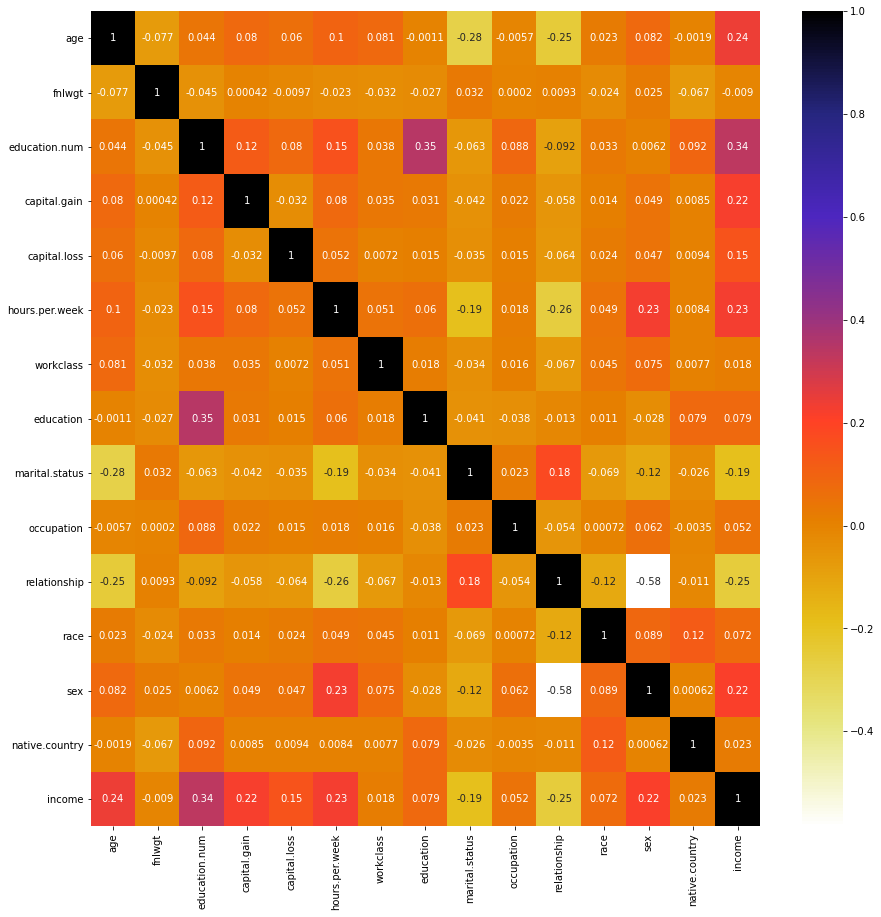

In [28]:
plt.figure(figsize=(15,15))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

There is no strong correlation between those attributes. We can able to take all those attributes to built the model except the target variable. But we are going to select the attributes based upon the histograms, boxplot, relationship between the target variable and the other attributes. 

**First MODEL with all the features**

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df.drop('income',axis=1)
y = df['income']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8523


**second model with feature selection**

In [42]:
#feature selection
df1=df[['age','education.num','workclass','capital.gain','education','occupation','hours.per.week','sex','income']]

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   education.num   30162 non-null  int64
 2   workclass       30162 non-null  int32
 3   capital.gain    30162 non-null  int64
 4   education       30162 non-null  int32
 5   occupation      30162 non-null  int32
 6   hours.per.week  30162 non-null  int64
 7   sex             30162 non-null  int32
 8   income          30162 non-null  int32
dtypes: int32(5), int64(4)
memory usage: 2.7 MB


In [45]:
X1 = df1.drop('income',axis=1)
y1 = df1['income']

In [46]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.20,random_state=10)

In [48]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X1_train, y1_train)
y_pred1 = rfc.predict(X1_test)

In [50]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y1_test, y_pred1)))

Model accuracy score with 10 decision-trees : 0.8061


The model with all the features gives the better accuracy of 85%.

**With the 100 estimators**

In [51]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8523


**K-fold validation**

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [53]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

In [54]:
from sklearn.model_selection import cross_val_score
#10-fold CV
scores = cross_val_score(rfc, X_train, y_train, scoring = 'r2', cv = 10)
scores

array([ 0.03506619,  0.01510204,  0.07499448, -0.02260802, -0.03813569,
       -0.05366336,  0.03284795,  0.02062971, -0.07686417,  0.00165563])

In [55]:
print(np.mean(scores))
scores_test = cross_val_score(rfc, X_test, y_test, cv = 10)
scores_test

-0.001097522564713016


array([0.8013245 , 0.78311258, 0.79635762, 0.77777778, 0.82587065,
       0.81426202, 0.80762852, 0.79767828, 0.78772803, 0.81426202])

In [56]:
print(np.mean(scores_test))

0.8006001998835842


In [57]:
data ={'rfc':97.40,'rfc_100':97.40,'rfc1':100,'rfc1_100':100,'kfold-cv':100}
models=list(data.keys())
accuracy=list(data.values())

**Percision and recall**

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4072  455]
 [ 715  791]]


<AxesSubplot:>

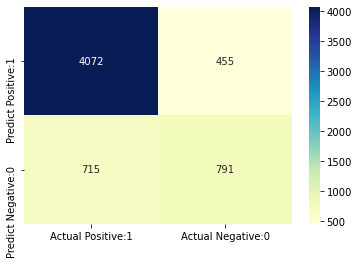

In [59]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4527
           1       0.63      0.53      0.57      1506

    accuracy                           0.81      6033
   macro avg       0.74      0.71      0.72      6033
weighted avg       0.80      0.81      0.80      6033

